In [1]:
# 데이터 준비
from google.colab import files
uploaded = files.upload()

# colab > run_project 폴더에 있는 colab_train_test.zip 파일을 선택합니다.
my_data = 'colab_train_test.zip'
!unzip colab_train_test.zip

Saving colab_train_test.zip to colab_train_test.zip
Archive:  colab_train_test.zip
   creating: test/ad/
  inflating: test/ad/ad_test_1.jpg   
  inflating: test/ad/ad_test_10.jpg  
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: test/ad/ad_test_26.jpg  
  inflating: test/ad/ad_test_27.jpg  
  inflating: test/ad/ad_test_28.jpg  
  inflating: test/ad/ad_test_29.jpg  
  inflating: test/ad/ad_test_3.jpg   
  inflating: test/ad/

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [3]:
np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

train_generator = train_datagen.flow_from_directory(
       'train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       'test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [4]:
class_map = {
    0: 'AD',
    1: 'Normal', 
}

(5, 150, 150, 3) (5,)
0.0


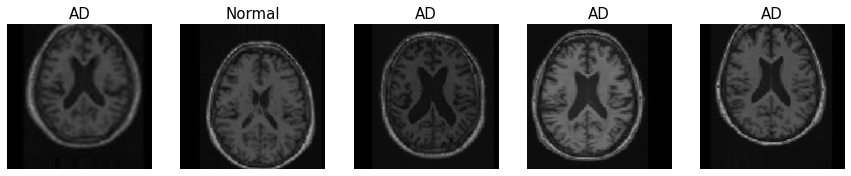

In [5]:
for x, y in train_generator:
    print(x.shape, y.shape)
    print(y[0])
    
    fig, axes = plt.subplots(1, 5)
    fig.set_size_inches(15, 15)
    for i in range(5):
        axes[i].imshow(x[i])
        axes[i].set_title(class_map[int(y[i])], fontsize=15)
        axes[i].axis('off')
    plt.show()
    break


In [ ]:
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

Epoch 1/20
30/30 [==============================] - 6s 188ms/step - loss: 0.7139 - accuracy: 0.4733 - val_loss: 0.6994 - val_accuracy: 0.4000
Epoch 2/20
30/30 [==============================] - 5s 175ms/step - loss: 0.6901 - accuracy: 0.5733 - val_loss: 0.6732 - val_accuracy: 0.5800
Epoch 3/20
30/30 [==============================] - 5s 175ms/step - loss: 0.6928 - accuracy: 0.4733 - val_loss: 0.6799 - val_accuracy: 0.6000
Epoch 4/20
30/30 [==============================] - 6s 184ms/step - loss: 0.6743 - accuracy: 0.5800 - val_loss: 0.6569 - val_accuracy: 0.8400
Epoch 5/20
30/30 [==============================] - 6s 191ms/step - loss: 0.6902 - accuracy: 0.5000 - val_loss: 0.6822 - val_accuracy: 0.4400
Epoch 6/20
30/30 [==============================] - 5s 183ms/step - loss: 0.6773 - accuracy: 0.5667 - val_loss: 0.6731 - val_accuracy: 0.5000
Epoch 7/20
30/30 [==============================] - 6s 186ms/step - loss: 0.6619 - accuracy: 0.6667 - val_loss: 0.6437 - val_accuracy: 0.5800
Epoch 

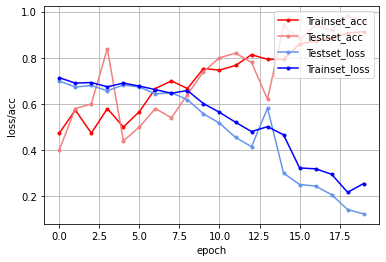

In [ ]:
#모델을 실행합니다
history = model.fit_generator(
       train_generator,
       steps_per_epoch=30,  #적절한 값으로 조절합니다
       epochs=20,   #적절한 값으로 조절합니다.
       validation_data=test_generator,
       validation_steps=10)

#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
